# Modelo de clasificación con Regresión Logística 
## Autora: Sandra Alonso Paz, estudiante del Máster en Biología Computacional.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Importación de los datos

### 1. Importar los datos del CSV

In [122]:
path ='dataset18.csv'
data = pd.read_csv(path)

### 2. Creamos las dos variables que utilizaremos en el modelo
   
    X = Atributos del modelo (columnas del CSV)
    
    Y = Columna target (la que queremos predecir a partir del resto de columnas)

In [123]:
X = data.iloc[:,2:23] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []

# Como la columna target esta compuesta por valores categóricos ordinales (R y NR) convertimos en valores numéricos (R=0, NR=1) 
for i in range (len(data)):
    if data.Target[i]=='R': #R
        Y.append(0)
    else:                   #NR
        Y.append(1)  

# Creación del modelo de Regresión Logística
### 1. Separamos el conjunto de datos en entrenamiento y prueba

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=125)

print('Tamaño del conjunto de entrenamiento:', len(X_train))
print('Tamaño de la columna objetivo del conjunto de entrenamiento:', len(y_train))
print('Tamaño del conjunto de prueba:', len(X_test))
print('Tamaño de la columna objetivo del conjunto de prueba:', len(y_test))

Tamaño del conjunto de entrenamiento: 34
Tamaño de la columna objetivo del conjunto de entrenamiento: 34
Tamaño del conjunto de prueba: 19
Tamaño de la columna objetivo del conjunto de prueba: 19


### 2. Instanciamos un GridSeacrgCV para averiguar que parámetros ajustan mejor el modelo

In [125]:
param_grid = {'C': [1,2,5,7,10],
            'solver': ['newton-cg','liblinear'], # No escogemos ‘lbfgs’, ‘sag’ ni ‘saga’ porque no termina de 
                                                 # ejecutarse debido a: "TOTAL NO. of ITERATIONS REACHED LIMIT"
            'max_iter':[25,50,100,200,500,1000],
            'random_state':[125]}

# Creamos un GridSearchCV que permite evaluar y seleccionar de forma sistemática los parámetros de nuestro modelo. 
# Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los 
# segundos mediante validación cruzada. 
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10],
                         'max_iter': [25, 50, 100, 200, 500, 1000],
                         'random_state': [125],
                         'solver': ['newton-cg', 'liblinear']})

In [126]:
print("Mejor estimación de parámetros según GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Mejor estimación de parámetros según GridSearchCV:


LogisticRegression(C=1, max_iter=25, random_state=125, solver='newton-cg')

# Cross Validation

In [127]:
print("Mejor resultado de la cross validation del modelo con mejores resultados: " +str(clf.best_score_))

Mejor resultado de la cross validation del modelo con mejores resultados: 0.7904761904761906


# Predicciones y estudio de resultados

In [128]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de entrenamiento
yhatTrain = model.predict(X_train)
contTrain = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [129]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de prueba
yhatTest = model.predict(X_test)
contTest = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

In [130]:
print('Precisión final en el conjunto de datos de entrenamiento: ' + str(contTrain/len(y_train)))
print('Precisión final en el conjunto de datos de prueba: ' + str(contTest/len(y_test)))

Precisión final en el conjunto de datos de entrenamiento: 1.0
Precisión final en el conjunto de datos de prueba: 0.6842105263157895


# Matriz de confusión
### 1. Matriz de confusión del conjunto de datos del entrenamiento

In [131]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Matriz de confusión (Entrenamiento)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Datos de entrada:  ' + str(np.array(y_train)))
print('Predicción:        ' +str(yhatTrain))

----------------Matriz de confusión (Entrenamiento)------------------
[[15  0]
 [ 0 19]]
Datos de entrada:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1]
Predicción:        [1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 15 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 19 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 0 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, responderán correctamente al mismo)
4. 0 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán al tratamiento)

### 2. Resultados obtenidos del conjunto de entrenamiento

In [132]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



### 3. Matriz de confusión del conjunto de datos de prueba

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Matriz de confusión (Prueba)------------------')
print(confusion_matrix)
print('Datos de entrada:  ' + str(np.array(y_test)))
print('Predicción:        ' +str(yhatTest))

----------------Matriz de confusión (Prueba)------------------
[[10  5]
 [ 1  3]]
Datos de entrada:  [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Predicción:        [1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 10 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 3 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 5 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, responderán correctamente al mismo)
4. 1 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán al mismo)

### 4. Resultados obtenidos del conjunto de prueba

In [134]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.38      0.75      0.50         4

    accuracy                           0.68        19
   macro avg       0.64      0.71      0.63        19
weighted avg       0.80      0.68      0.71        19



# Visualización de resultados

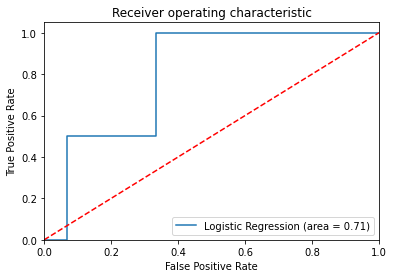

In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Bibliografía
https://moodle.upm.es/titulaciones/oficiales/pluginfile.php/10054676/mod_resource/content/3/Unit2.2-SupervisedLearning-Classification-LogisticRegression.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://github.com/SandraAlonso/PRACTICA-IC3

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.htmlhttps://stackoverflow.com/questions/57085897/python-logistic-regression-max-iter-parameter-is-reducing-the-accuracy

https://www.delftstack.com/es/howto/numpy/list-to-numpy-array-python/

https://www.iartificial.net/regresion-logistica-para-clasificacion/#Curiosidades

https://www.kaggle.com/getting-started/27261